Objective:

Apply your knowledge of NumPy, Pandas, and Matplotlib to analyze a real-world dataset. Utilize advanced statistical functions and array operations in NumPy, and integrate these with Pandas for data manipulation and Matplotlib for visualization.



Dataset:

You will work with the “Global Power Plant Database” provided by the World Resources Institute, which contains detailed information about power plants worldwide. This dataset is ideal for practicing array manipulations, statistical analysis, and time series data handling.

Download the dataset here.

or you can download it directly

Here.



Tasks:

Data Import and Cleaning:

Import the dataset using Pandas.
Identify missing values and handle them appropriately.
Use NumPy to convert relevant columns to numerical types if necessary.
Exploratory Data Analysis:

Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
Explore the distribution of power plants by country and fuel type.
Statistical Analysis:

Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.
Time Series Analysis:

If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
Explore how the mix of fuel types for power generation has evolved over the years.
Advanced Visualization:

Create visualizations using Matplotlib and Seaborn to illustrate your findings.
Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.
Matrix Operations in Real-World Context:

Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
Discuss the relevance of eigenvectors and eigenvalues in this context.
Integrating NumPy with Pandas and Matplotlib:

Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

In [10]:
#list of imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Data Import and Cleaning:

Import the dataset using Pandas.
Identify missing values and handle them appropriately.
Use NumPy to convert relevant columns to numerical types if necessary.

In [2]:
#Import the dataset using Pandas.
df = pd.read_csv('global_power_plant_database.csv', header=0, index_col='gppd_idnr', low_memory=False, dtype={'commissioning_year': 'object'})

#Identify missing values and handle them appropriately.
#Remove duplicate rows
df.drop_duplicates()
#Remove redundant columns:
#wepp_id serves the same purpose as 'gppd_idnr'
#country_long is redundant with country
#other_fuelX are redundant under the assumption that their share is negligible respective to primary_fuel
df.drop(columns=['wepp_id', 'country_long', 'other_fuel1', 'other_fuel2', 'other_fuel3'], inplace=True)
#Remove irrelevant columns:
#'source', 'url', 'geolocation_source' and 'year_of_capacity_data', 'generation_data_source' are related to data tracability. Irrevelevant to the analysis
df.drop(columns=['source', 'url', 'geolocation_source', 'year_of_capacity_data', 'generation_data_source'], inplace=True)
# Create a new column combining both sources
for i in range(5):
    df[f'final_generation_gwh_{2013+i}'] = np.where(
        df[f'generation_gwh_{2013+i}'].isna(),  # Check if reported data is missing
        df[f'estimated_generation_gwh_{2013+i}'],  # Use estimate if missing
        df[f'generation_gwh_{2013+i}']  # Otherwise, use reported data
    )
    df.drop(columns=[f'generation_gwh_{2013+i}', f'estimated_generation_gwh_{2013+i}'], inplace=True)

#Remove generation_gwh_2018 and generation_gwh_2019 for too few non-null values
df.drop(columns=['generation_gwh_2018', 'generation_gwh_2019'], inplace=True)

#Convert 'commissioning_year' into int, and managing missing values
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mode()[0]).astype(int)

#Change all null value for 'owner' as 'Unknown'
df['owner'] = df['owner'].fillna('Unknown')

for i in range(5):
    df[f'final_generation_gwh_{2013+i}'] = df[f'final_generation_gwh_{2013+i}'].fillna(np.mean(df[f'final_generation_gwh_{2013+i}']))

print(df.head())
print(df.describe())
print(df.info())

             country                                              name  \
gppd_idnr                                                                
GEODB0040538     AFG      Kajaki Hydroelectric Power Plant Afghanistan   
WKS0070144       AFG                                      Kandahar DOG   
WKS0071196       AFG                                      Kandahar JOL   
GEODB0040541     AFG     Mahipar Hydroelectric Power Plant Afghanistan   
GEODB0040534     AFG  Naghlu Dam Hydroelectric Power Plant Afghanistan   

              capacity_mw  latitude  longitude primary_fuel  \
gppd_idnr                                                     
GEODB0040538         33.0    32.322    65.1190        Hydro   
WKS0070144           10.0    31.670    65.7950        Solar   
WKS0071196           10.0    31.623    65.7920        Solar   
GEODB0040541         66.0    34.556    69.4787        Hydro   
GEODB0040534        100.0    34.641    69.7170        Hydro   

              commissioning_year    own

Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
Explore the distribution of power plants by country and fuel type.

In [3]:
 #Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
# Select numerical columns (float and int)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Summary stats
summary_stats = df[num_cols].agg(['mean', 'median', 'std']).transpose()
print(summary_stats)

#Explore the distribution of power plants by country and fuel type.
fuel_country_table = pd.crosstab(df['country'],
                                 df['primary_fuel'])
print(fuel_country_table)



                                  mean       median          std
capacity_mw                 163.355148    16.745000   489.636072
latitude                     32.816637    39.727750    22.638603
longitude                    -6.972803    -2.127100    78.405850
commissioning_year         2006.689632  2016.000000    19.004770
final_generation_gwh_2013   352.618150   352.618150  1194.516135
final_generation_gwh_2014   387.915170   286.878506  1332.662962
final_generation_gwh_2015   433.528353   200.450000  1501.636661
final_generation_gwh_2016   420.962741   144.777500  1507.766023
final_generation_gwh_2017   673.292818    38.615000  2420.863468
primary_fuel  Biomass  Coal  Cogeneration  Gas  Geothermal  Hydro  Nuclear  \
country                                                                      
AFG                 0     0             0    1           0      6        0   
AGO                 0     0             0    3           0      5        0   
ALB                 0     0           

Time Series Analysis:

If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
Explore how the mix of fuel types for power generation has evolved over the years.

In [6]:
#If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
#Aggregate capacity by commissioning year:
capacity_by_year = df.groupby('commissioning_year')['capacity_mw'].sum().sort_index()
print(capacity_by_year.head())
#Use NumPy to analyze trend: rolling mean or simple moving average
years = capacity_by_year.index.to_numpy()
capacity = capacity_by_year.to_numpy()
# Calculate a 5-year rolling mean (simple smoothing)
window = 5
rolling_mean = np.convolve(capacity, np.ones(window)/window, mode='valid')
print("Years (for rolling mean):", years[window-1:])
print("Smoothed capacity:", rolling_mean)

#Explore how the mix of fuel types for power generation has evolved over the years.
#Calculate total capacity per year and fuel
fuel_year_capacity = df.groupby(['commissioning_year', 'primary_fuel'])['capacity_mw'].sum().unstack(fill_value=0)
print(fuel_year_capacity.head())
#Calculate yearly fuel mix proportions
fuel_year_proportions = fuel_year_capacity.divide(fuel_year_capacity.sum(axis=1), axis=0)
print(fuel_year_proportions.head())


commissioning_year
1896     2.00
1899     3.20
1900    88.94
1901     7.40
1902    23.50
Name: capacity_mw, dtype: float64
Years (for rolling mean): [1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915
 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929
 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943
 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957
 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]
Smoothed capacity: [2.50080000e+01 3.84080000e+01 3.92080000e+01 4.71700000e+01
 5.84300000e+01 7.62500000e+01 9.05500000e+01 1.07290000e+02
 1.33320000e+02 1.34812600e+02 1.55197400e+02 1.71017400e+02
 3.56687400e+02 3.53887400e+02 3.90194800e+0

Advanced Visualization:

Create visualizations using Matplotlib and Seaborn to illustrate your findings.
Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.

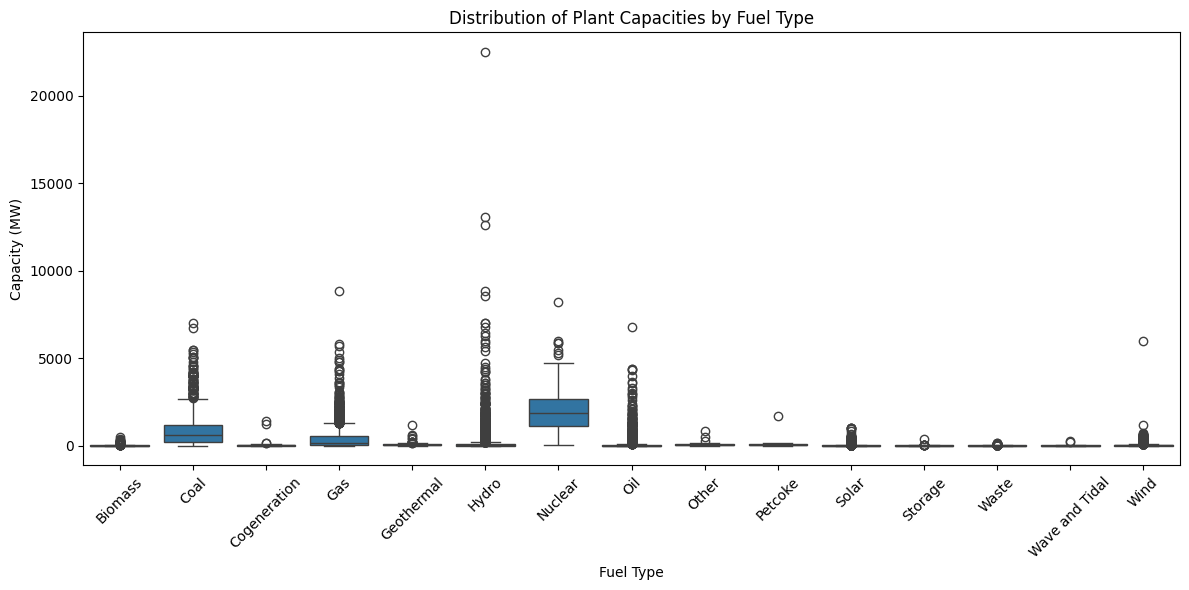

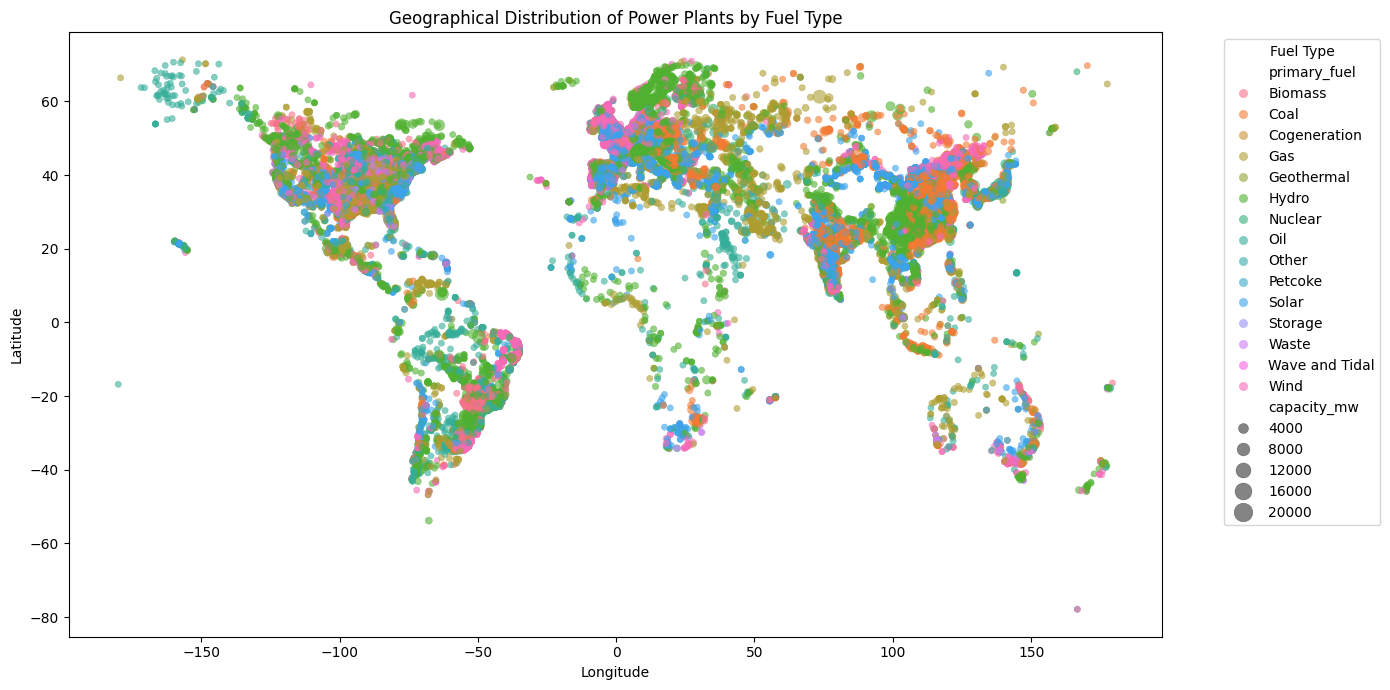

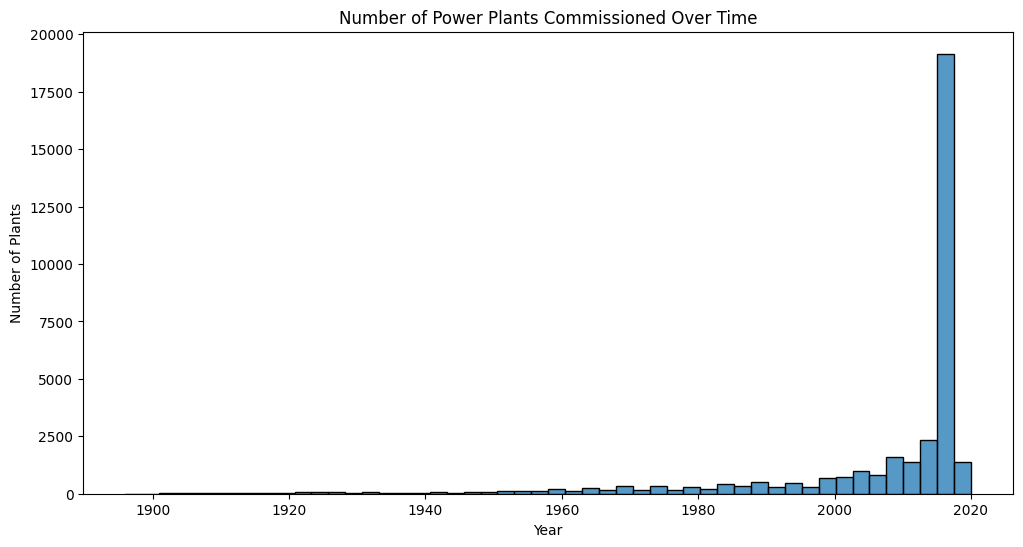

/var/folders/9m/2x6dfbbn0cq5m_g98d1wpw640000gn/T/ipykernel_37347/425319479.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuel_mix = df_year.groupby(['decade', 'primary_fuel'])['capacity_mw'].sum().unstack().fillna(0)


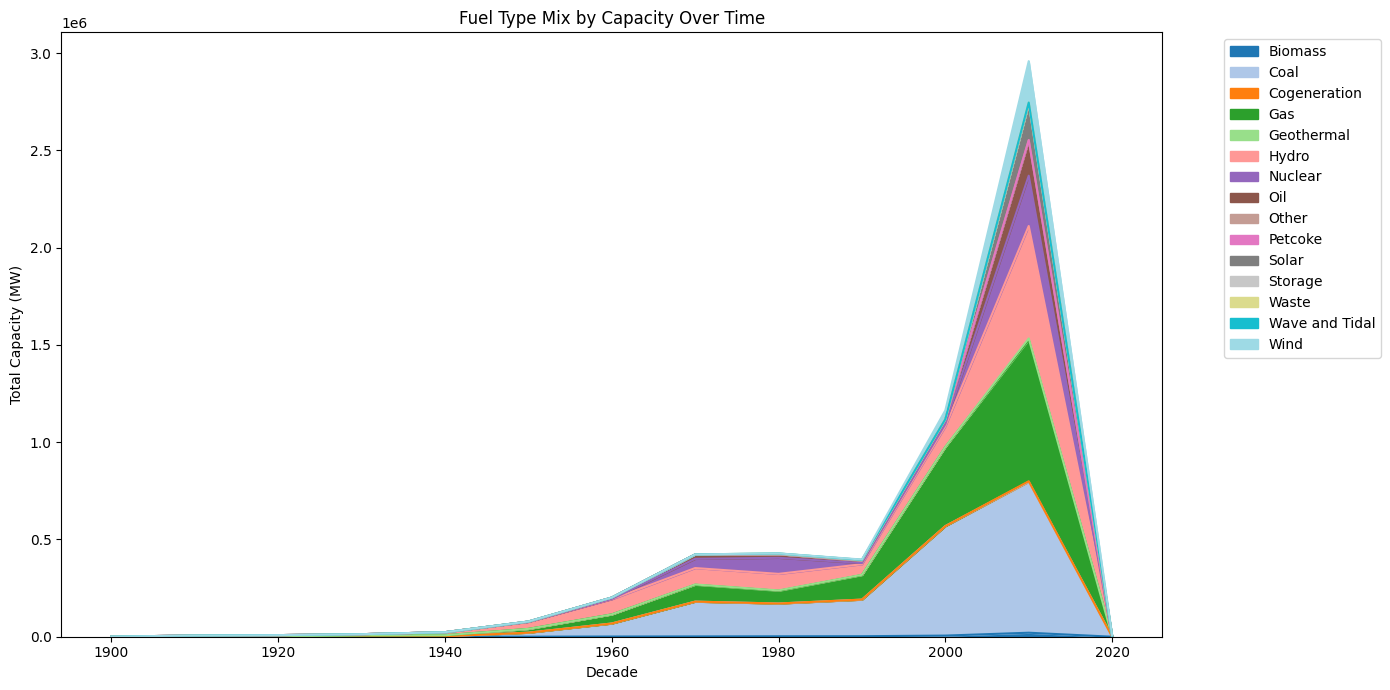

In [9]:
#Power Plant Capacity Distribution by Fuel Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='primary_fuel', y='capacity_mw')
plt.xticks(rotation=45)
plt.title('Distribution of Plant Capacities by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Capacity (MW)')
plt.tight_layout()
plt.show()

#Geographical Distribution of Power Plants
# Ensure the fuel type column is clean and categorical
df['primary_fuel'] = df['primary_fuel'].str.strip().astype('category')

# Create the plot
plt.figure(figsize=(14, 7))
scatter = sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='primary_fuel',
    size='capacity_mw',
    sizes=(20, 200),
    alpha=0.6,
    edgecolor=None,
    legend='brief'  # Only show one legend for hue
)

# Set plot titles and axis labels
plt.title('Geographical Distribution of Power Plants by Fuel Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Move legend out of the way and make sure it’s for fuel types only
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



#Power Plant Commissions Over Time
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['commissioning_year'] > 0], x='commissioning_year', bins=50, kde=False)
plt.title('Number of Power Plants Commissioned Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Plants')
plt.show()

#Fuel Type Mix Over Time
df_year = df[df['commissioning_year'] > 1900].copy()
df_year['decade'] = (df_year['commissioning_year'] // 10) * 10
fuel_mix = df_year.groupby(['decade', 'primary_fuel'])['capacity_mw'].sum().unstack().fillna(0)

fuel_mix.plot(kind='area', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Fuel Type Mix by Capacity Over Time')
plt.xlabel('Decade')
plt.ylabel('Total Capacity (MW)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Matrix Operations in Real-World Context:

Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
Discuss the relevance of eigenvectors and eigenvalues in this context.

In [ ]:
#Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
# Encode primary_fuel as integer
le = LabelEncoder()
df['fuel_code'] = le.fit_transform(df['primary_fuel'])

# Build matrix: [capacity, latitude, longitude, fuel_code]
X = df[['capacity_mw', 'latitude', 'longitude', 'fuel_code']].to_numpy()

# Center the data
X_centered = X - np.mean(X, axis=0)

# Covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)
print("Covariance matrix:\n", cov_matrix)
#The large variance in capacity_mw (2.39e+05) shows it has the widest spread among variables.
#The covariance between capacity_mw and longitude is 5.81e+03, suggesting a modest positive relationship: plants in certain longitudes tend to be bigger.
#The other covariances are small, implying weak correlation between location and fuel type.

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eig_vals)
#PC1 explains ~96% of the variance (almost entirely about capacity).
#PC2 explains ~2.4%
#PC3 and PC4 are very minor.
#So the first component dominates — your data’s variance is mostly driven by capacity differences.
print("Eigenvectors:\n", eig_vecs)
#PC1 is almost entirely aligned with capacity (strong negative weight on it).
#Other variables contribute almost nothing.
#So, PC1 is a "capacity direction", and that’s what most variation is about.
#PC2 reflects longitude, with small contributions from capacity and latitude. It tells you how plants are distributed east–west.
#PC3 is mostly fuel type. Yet, though it explains very little variance (~0.006%)
#Dataset is dominated by differences in plant capacity — it explains nearly all the variation.
#Other axes (e.g., geography and fuel type) explain very little variance, meaning there's no strong pattern connecting fuel type to specific locations or capacities.
#Fuel type can be isolated using PC3, but it's not a strong dimension in terms of raw data variance.

Covariance matrix:
 [[ 2.39743483e+05 -1.46512725e+02  5.81707732e+03 -6.11727883e+02]
 [-1.46512725e+02  5.12506327e+02 -1.21328995e+02  1.49091105e+01]
 [ 5.81707732e+03 -1.21328995e+02  6.14747738e+03 -1.26704816e+01]
 [-6.11727883e+02  1.49091105e+01 -1.26704816e+01  1.78902035e+01]]
Eigenvalues:
 [2.39889906e+05 6.00522912e+03 1.58984104e+01 5.10323423e+02]
Eigenvectors:
 [[-9.99687011e-01  2.48861681e-02 -2.55548938e-03 -1.67028783e-04]
 [ 6.24634938e-04  2.14123067e-02  2.94850166e-02 -9.99335658e-01]
 [-2.48793716e-02 -9.99460881e-01  9.42325144e-04 -2.14027377e-02]
 [ 2.55078094e-03 -3.74235338e-04 -9.99561512e-01 -2.94981045e-02]]


Integrating NumPy with Pandas and Matplotlib:

Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

                                name country  capacity_mw primary_fuel
gppd_idnr                                                             
WRI1002171                     Koman     ALB        600.0        Hydro
WRI1023004                   Capanda     AGO        520.0        Hydro
ARG0000230                   ALICURA     ARG       1050.0        Hydro
ARG0000255                 EL CHOCON     ARG       1200.0        Hydro
ARG0000233  PIEDRA DEL AGUILA (CPSA)     ARG       1400.0        Hydro
             country                                              name  \
gppd_idnr                                                                
GEODB0040538     AFG      Kajaki Hydroelectric Power Plant Afghanistan   
WKS0070144       AFG                                      Kandahar DOG   
WKS0071196       AFG                                      Kandahar JOL   
GEODB0040541     AFG     Mahipar Hydroelectric Power Plant Afghanistan   
GEODB0040534     AFG  Naghlu Dam Hydroelectric Power Plant 

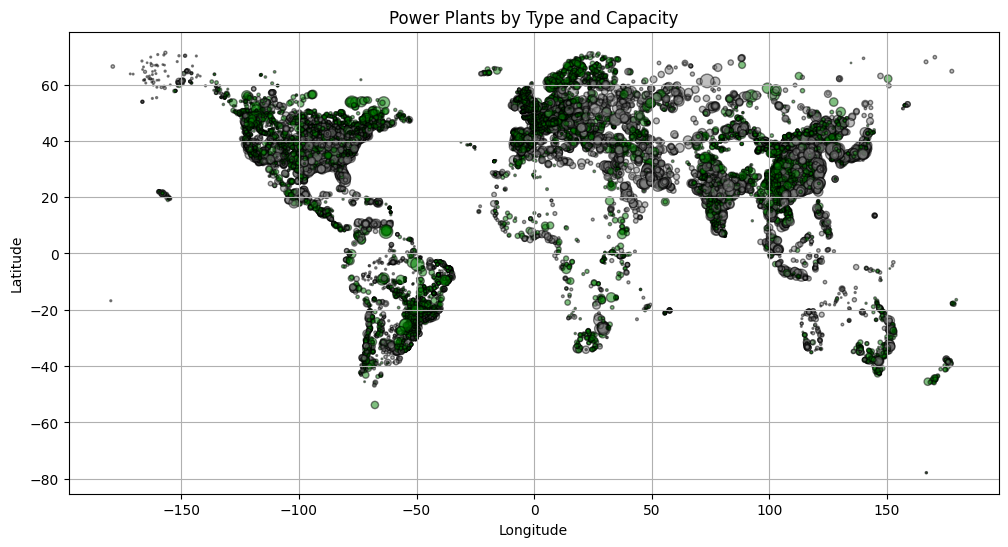

/var/folders/9m/2x6dfbbn0cq5m_g98d1wpw640000gn/T/ipykernel_37347/947757607.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuel_mix = df.groupby(['decade', 'primary_fuel'])['capacity_mw'].sum().unstack().fillna(0)


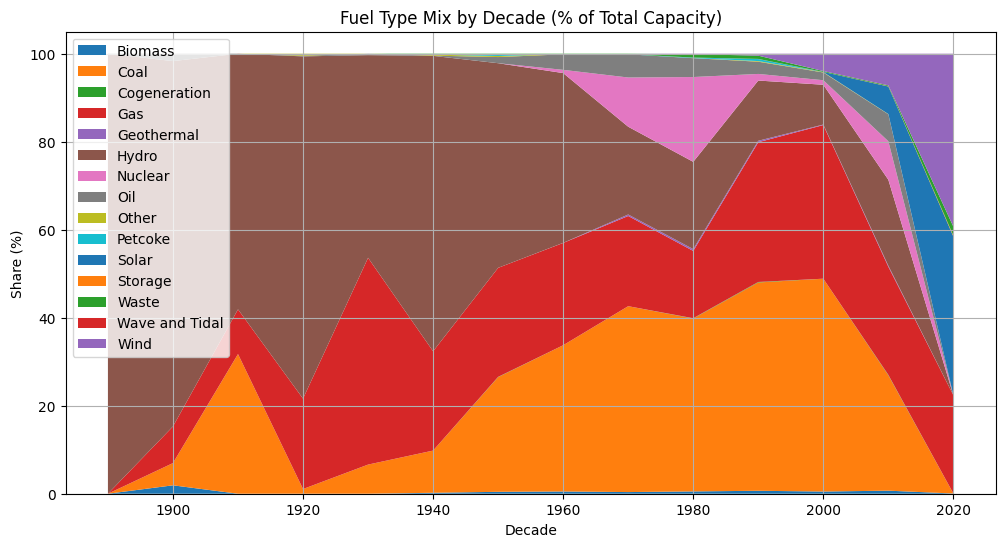

In [13]:
#Using NumPy in Pandas Data Manipulation
#Complex Filtering with NumPy Conditions: Find high-capacity renewable plants
renewable_fuels = ['Hydro', 'Solar', 'Wind', 'Biomass']
mask = (df['capacity_mw'] > 500) & (np.isin(df['primary_fuel'], renewable_fuels))
high_capacity_renewables = df[mask]
print(high_capacity_renewables[['name', 'country', 'capacity_mw', 'primary_fuel']].head())

#NumPy Aggregation with Pandas Grouping
# Mean generation over years using NumPy
years = [2013, 2014, 2015, 2016, 2017]
cols = [f'final_generation_gwh_{y}' for y in years]
# Calculate row-wise mean generation
df['mean_generation_gwh'] = np.nanmean(df[cols].values, axis=1)
print(df.head())


#Enhancing Matplotlib Visualizations with NumPy
#Custom Colormaps and Bubble Size Scaling
# Use NumPy to normalize capacity for bubble sizes
cap_scaled = np.sqrt(df['capacity_mw'].values)
colors = np.where(np.isin(df['primary_fuel'], renewable_fuels), 'green', 'gray')
plt.figure(figsize=(12, 6))
plt.scatter(df['longitude'], df['latitude'], s=cap_scaled, c=colors, alpha=0.5, edgecolor='k')
plt.title("Power Plants by Type and Capacity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

#Fuel Mix Evolution with Stacked Area Chart
# Group by decade and fuel type using Pandas
df['decade'] = (df['commissioning_year'] // 10) * 10
fuel_mix = df.groupby(['decade', 'primary_fuel'])['capacity_mw'].sum().unstack().fillna(0)
# Use NumPy to convert to cumulative percentages
percent_mix = (fuel_mix.values.T / fuel_mix.values.sum(axis=1)).T * 100
# Plot stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(fuel_mix.index, percent_mix.T, labels=fuel_mix.columns)
plt.title("Fuel Type Mix by Decade (% of Total Capacity)")
plt.xlabel("Decade")
plt.ylabel("Share (%)")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


